#### IMPORTING THE LIBRARIES ####

In [1]:
import numpy as np 
import pandas as pd 

#### READ THE DATASET ####

In [2]:
encodings=['utf-8','latin','ISO-8859-1','cp1252']
file_path=r"c:\Users\Bhuvaneswari\Desktop\SMS spam classifier\spam.csv"
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print("File successfully read with encoding:",encoding)
        break
    except UnicodeDecodeError:
        print("Failed to read encoding:",encoding)
        continue
if 'df' in locals():
    print('File loaded')
else:
    print('Failed to load')

Failed to read encoding: utf-8
File successfully read with encoding: latin
File loaded


#### SAMPLE OF THE DATASET ####

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3939,ham,Does daddy have a bb now.,NaN,NaN,NaN
1503,ham,Ill be there on &lt;#&gt; ok.,NaN,NaN,NaN
241,ham,PLEASSSSSSSEEEEEE TEL ME V AVENT DONE SPORTSx,NaN,NaN,NaN
2864,ham,He says hi and to get your ass back to south t...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
2726,ham,No i am not having not any movies in my laptop,NaN,NaN,NaN
5076,ham,"Guy, no flash me now. If you go call me, call ...",NaN,NaN,NaN
3640,spam,You can stop further club tones by replying \S...,"PO Box 1146 MK45 2WT (2/3)""",NaN,NaN
4837,ham,All boys made fun of me today. Ok i have no pr...,NaN,NaN,NaN
5278,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN


#### DATA MATRIX ####

In [4]:
df.shape

(5572, 5)

#### DATA CLEANING ####

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### DROPPING LAST 3 COLUMNS ####

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(10)

,v1,v2
1138,ham,What * u wearing?
437,ham,How long does applebees fucking take
3250,ham,"IÛ÷ll leave around four, ok?"
224,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
96,ham,Watching telugu movie..wat abt u?
4717,ham,My uncles in Atlanta. Wish you guys a great se...
3988,ham,Ok lor. Anyway i thk we cant get tickets now c...
5525,ham,I want to tell you how bad I feel that basical...
1718,ham,"As in missionary hook up, doggy hook up, stand..."
2126,ham,You do got a shitload of diamonds though


#### RENAMING COL1 AS TARGET AND COL2 AS TEXT ####

In [7]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(10)

,Target,Text
1738,ham,K go and sleep well. Take rest:-).
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..
5152,ham,Idk. I'm sitting here in a stop and shop parki...
3708,ham,Ok.ok ok..then..whats ur todays plan
5414,ham,East coast
4142,spam,In The Simpsons Movie released in July 2007 na...
3401,ham,'An Amazing Quote'' - \Sometimes in life its d...
5062,ham,Ok i also wan 2 watch e 9 pm show...
1388,ham,Oh k.i think most of wi and nz players unsold.
1820,ham,I'll probably be by tomorrow (or even later to...


#### LABEL ENCODING ####

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### MISSING VALUES ####

In [9]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

#### CHECKING FOR DUPLICATES ####

In [10]:
df.duplicated().sum()

403

#### REMOVING DUPLICATES ####

In [11]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

#### DATA EXPLORATION ####

In [13]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1129a5653d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

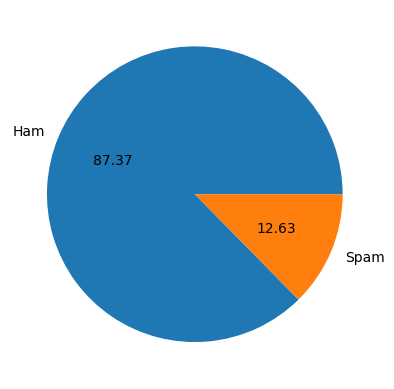

In [14]:
import matplotlib.pyplot as plt 
plt.pie(df['Target'].value_counts(),
labels=['Ham','Spam'],autopct='%0.2f')

In [15]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
df['num_char']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [17]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


#### TARGETING HAM(0) ####

In [18]:
df[df['Target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


#### TARGETING SPAM(1) ####

In [19]:
df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


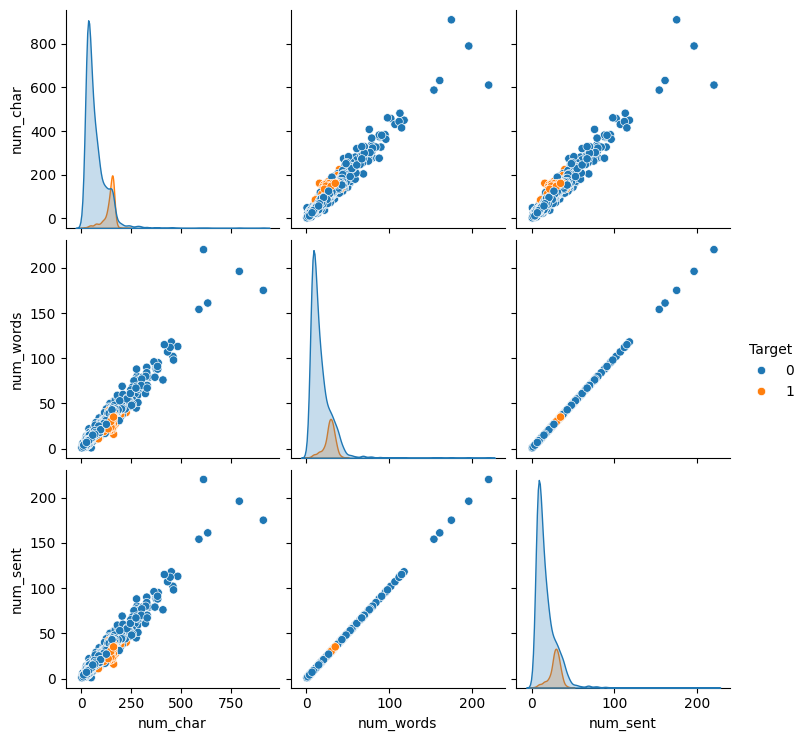

In [20]:
import seaborn as sns
sns.pairplot(df,hue='Target')


#### HEATMAP ####

<Axes: >

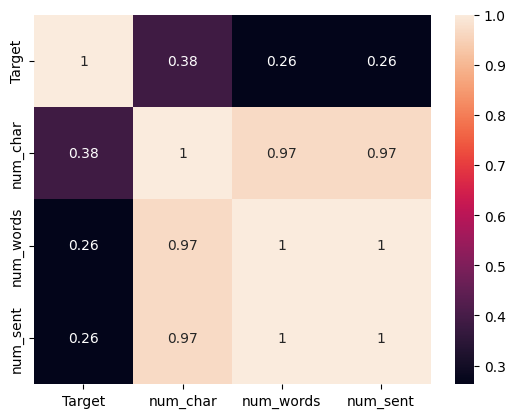

In [21]:
sns.heatmap(df[['Target','num_char','num_words','num_sent']].corr(),annot=True)

#### DATA PREPROCESSING ####

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()
def transformText(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        text=y[:]
        y.clear()
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
            text=y[:]
            y.clear()
        for i in text:
            y.append(ps.stem(i))
        return " ".join(y)
    transformed_Text=transformText("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
    print(transformed_Text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhuvaneswari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df['Text'][30]
{"type":"string"}
df["transformed_Text"]=df['Text'].apply(transformText)
df.head()

,Target,Text,num_char,num_words,num_sent,transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


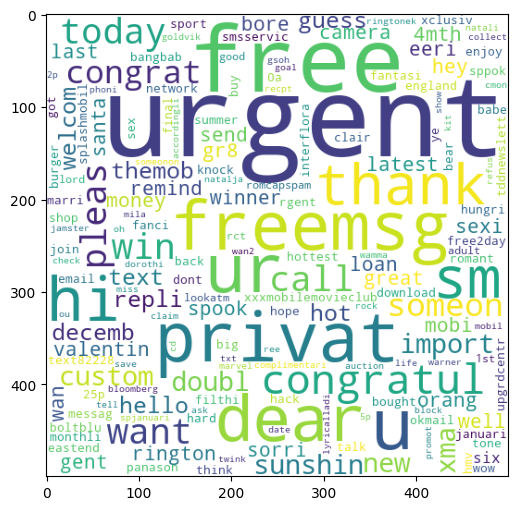

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target']==1]['transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

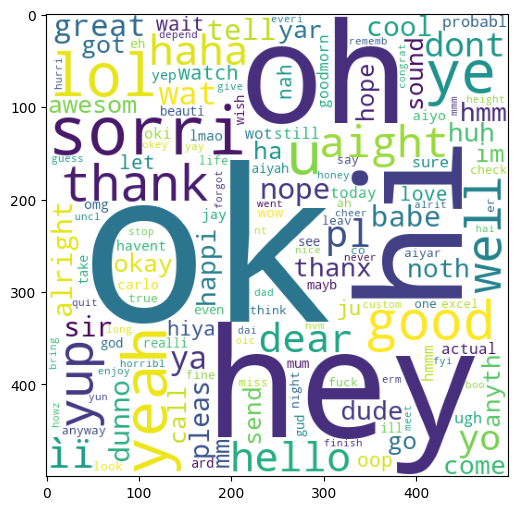

In [25]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [26]:
df.sample(5)

,Target,Text,num_char,num_words,num_sent,transformed_Text
4544,0,Never y lei... I v lazy... Got wat? Dat day Ì_...,78,22,22,never
29,0,Ahhh. Work. I vaguely remember that! What does...,64,16,16,ahhh
2161,0,Is she replying. Has boye changed his phone nu...,50,10,10,
856,0,Going to take your babe out ?,29,7,7,go
1455,1,Summers finally here! Fancy a chat or flirt wi...,159,33,33,summer


In [27]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

480

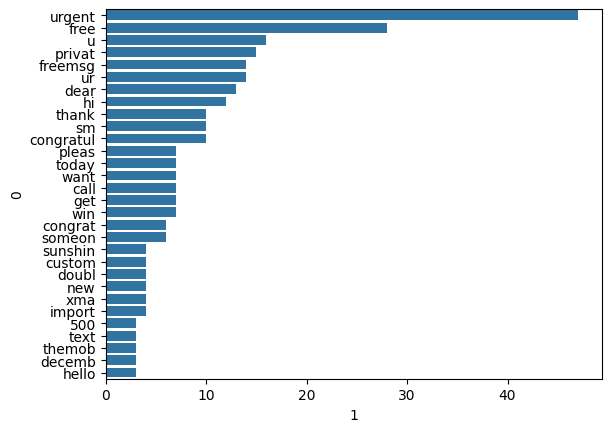

In [28]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],
y=pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.show()

In [29]:
ham_corpus=[]
for msg in df[df['Target']==1]['transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

480

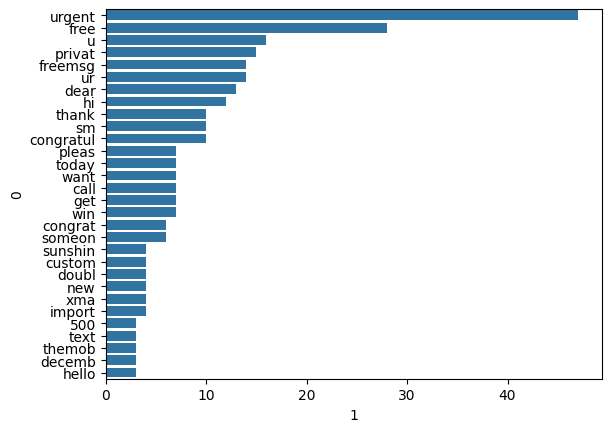

In [30]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
y=pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.show()

#### MODEL BUILING ####
#### FEATURE EXTRACTION ####

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['transformed_Text']).toarray()
y=df['Target'].values 

#### SPLITTING DATA TRAINING DATA AND TEST DATA ####

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

#### TRAINING THE MODEL ####
#### LOGISTIC REGRESSION ####

In [33]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

#### MULTINOMIALNB ####

In [34]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

MultinomialNB()

#### EVALUATING THE TRAINING MODEL ####

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

#### LOGISTIC REGRESSION EVALUATION ####

In [36]:
#PREDICTION ON TEST DATA
y_pred0 = lrc.predict(x_test)
print(accuracy_score(y_test, y_pred0))
print(confusion_matrix(y_test, y_pred0))
print(precision_score(y_test, y_pred0))

0.8868471953578336
[[894   0]
 [117  23]]
1.0


#### MULTINOMIALNB EVALUATION ####

In [37]:
#PREDICTION ON TEST DATA
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8868471953578336
[[894   0]
 [117  23]]
1.0


#### BUILDING A PREDICTIVE SYSTEM ####

In [38]:
input_msg="you've won! congratulations! you've won a $500 amazon gift card.claim it here"

In [39]:
#TRANSFORMING INPUT DATA 
transformedInput = transformText(input_msg)
vector_input = tfidf.transform([transformedInput])

In [40]:
#MAKING PREDICTION
prediction = mnb.predict(vector_input)[0]
if(prediction==1):
    print("spam SMS")
else:
    print("Ham SMS")

Ham SMS
